<a href="https://colab.research.google.com/github/tuomaseerola/emr/blob/master/Chapter9.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 9 Code - Expressive Timing

A Jupyter notebook with **code examples in R** for _Chapter 9_ of _Routlegde_ book titled **[How to Conduct Empirical Music Research](https://github.com/tuomaseerola/emr)** by [Tuomas Eerola](https://www.durham.ac.uk/staff/tuomas-eerola/), [Music and Science Lab]() at [Durham University](https://www.durham.ac.uk) and [Music and Science Lab](https://musicscience.net) scheduled to be published in 2023.

To run the code in your browser, open the file in Colab (click the icon "Open in Colab"). Alternatively, you can download the notebook and run it locally.

This notebook demonstrates expressive timing profiles from real performances from https://github.com/fosfrancesco/asap-dataset

File `Chapter9.4.ipynb` | Version `4/3/2023` | [Back to Index](https://github.com/tuomaseerola/emr)

---

### Load libraries

In [12]:
library(ggplot2,quietly = TRUE)
library(tidyverse,quietly = TRUE)
library(dplyr)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ purrr   1.0.1
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Get data from ASAP project
This gets the metadata from ASAP project (see Foscarin et al., 2020) and selects Preludes op 23.4.

In [13]:
d <- read.csv("https://raw.githubusercontent.com/fosfrancesco/asap-dataset/master/metadata.csv",header = TRUE,sep = ',')
df<-dplyr::filter(d,title=='Preludes_op_23_4')
df<-df[1:3,]
#print(head(df))

      composer            title                        folder
1 Rachmaninoff Preludes_op_23_4 Rachmaninoff/Preludes_op_23/4
2 Rachmaninoff Preludes_op_23_4 Rachmaninoff/Preludes_op_23/4
3 Rachmaninoff Preludes_op_23_4 Rachmaninoff/Preludes_op_23/4
                                         xml_score
1 Rachmaninoff/Preludes_op_23/4/xml_score.musicxml
2 Rachmaninoff/Preludes_op_23/4/xml_score.musicxml
3 Rachmaninoff/Preludes_op_23/4/xml_score.musicxml
                                    midi_score
1 Rachmaninoff/Preludes_op_23/4/midi_score.mid
2 Rachmaninoff/Preludes_op_23/4/midi_score.mid
3 Rachmaninoff/Preludes_op_23/4/midi_score.mid
                                midi_performance
1 Rachmaninoff/Preludes_op_23/4/ChenGuang12M.mid
2   Rachmaninoff/Preludes_op_23/4/MorozovS09.mid
3      Rachmaninoff/Preludes_op_23/4/WuuE07M.mid
                                     performance_annotations
1 Rachmaninoff/Preludes_op_23/4/ChenGuang12M_annotations.txt
2   Rachmaninoff/Preludes_op_23/4/MorozovS

In [14]:
deadpan <- read.csv('data/midi_score_annotations.txt',header = FALSE, sep = '\t')
print(head(deadpan))
fn <- NULL
fn[1]<-'data/ChenGuang12M_annotations.txt'
fn[2]<-'data/MorozovS09_annotations.txt'
fn[3]<-'data/WuuE07M_annotations.txt'
Performer <- c('Chen Guang','Yevgeny Morozov','Elliot Wuu')


   V1  V2       V3
1 0.0 0.0 db,3/4,2
2 1.2 1.2        b
3 2.4 2.4        b
4 3.6 3.6       db
5 4.8 4.8        b
6 6.0 6.0        b


In [15]:
normperf <- function(d=NULL) {
  # function to normalise performance timing given score
  # And calculate deviation in ms
  d$perf_N<-d$perf
  d$perf_N<-d$perf_N - min(d$perf_N)
  d$perf_N <- d$perf_N * (max(d$score)/max(d$perf_N))
  d$delta <- d$perf_N - d$score
  d$delta2 <- c(0,diff(d$delta)*1000)
  d$scoredelta <- c(0,diff(d$score)*1000)
  d$rawperfdelta <- c(0,diff(d$perf)*1000)
  d$rawperf_Ndelta <- c(0,diff(d$perf_N)*1000)
  d$scoredelta_rawperf_Ndelta <- d$rawperf_Ndelta - d$scoredelta
  d$annotation<-d$annotation
  result <- d
  return(result)
}

In [17]:
D<-NULL
for (k in 1:length(fn)) {
  perf <- read.csv(fn[k],header = FALSE, sep = '\t')
  DF<-data.frame(score=deadpan$V1,perf=perf$V1,annotation=deadpan$V3)
  DF <- dplyr::filter(DF,score < 30) # Limit to first 10 bars = 3*10 beats
  DF2 <- normperf(DF)
  DF2$Performer<-Performer[k]
  D<-rbind(D,DF2)
}

options(encoding = "UTF-8")
library(dplyr)
DF <- dplyr::filter(D,score < 30) # First 10 bars = 3*10 beats
print(head(DF))

  score     perf annotation   perf_N     delta     delta2 scoredelta
1   0.0 0.000000   db,3/4,2 0.000000 0.0000000    0.00000          0
2   1.2 1.916667          b 1.935339 0.7353393  735.33933       1200
3   2.4 3.009115          b 3.038430 0.6384300  -96.90928       1200
4   3.6 4.179688         db 4.220407 0.6204069  -18.02318       1200
5   4.8 5.476562          b 5.529915 0.7299151  109.50825       1200
6   6.0 6.526042          b 6.589619 0.5896192 -140.29588       1200
  rawperfdelta rawperf_Ndelta scoredelta_rawperf_Ndelta  Performer
1        0.000          0.000                   0.00000 Chen Guang
2     1916.667       1935.339                 735.33933 Chen Guang
3     1092.448       1103.091                 -96.90928 Chen Guang
4     1170.573       1181.977                 -18.02318 Chen Guang
5     1296.874       1309.508                 109.50825 Chen Guang
6     1049.480       1059.704                -140.29588 Chen Guang


`geom_smooth()` using formula = 'y ~ x'


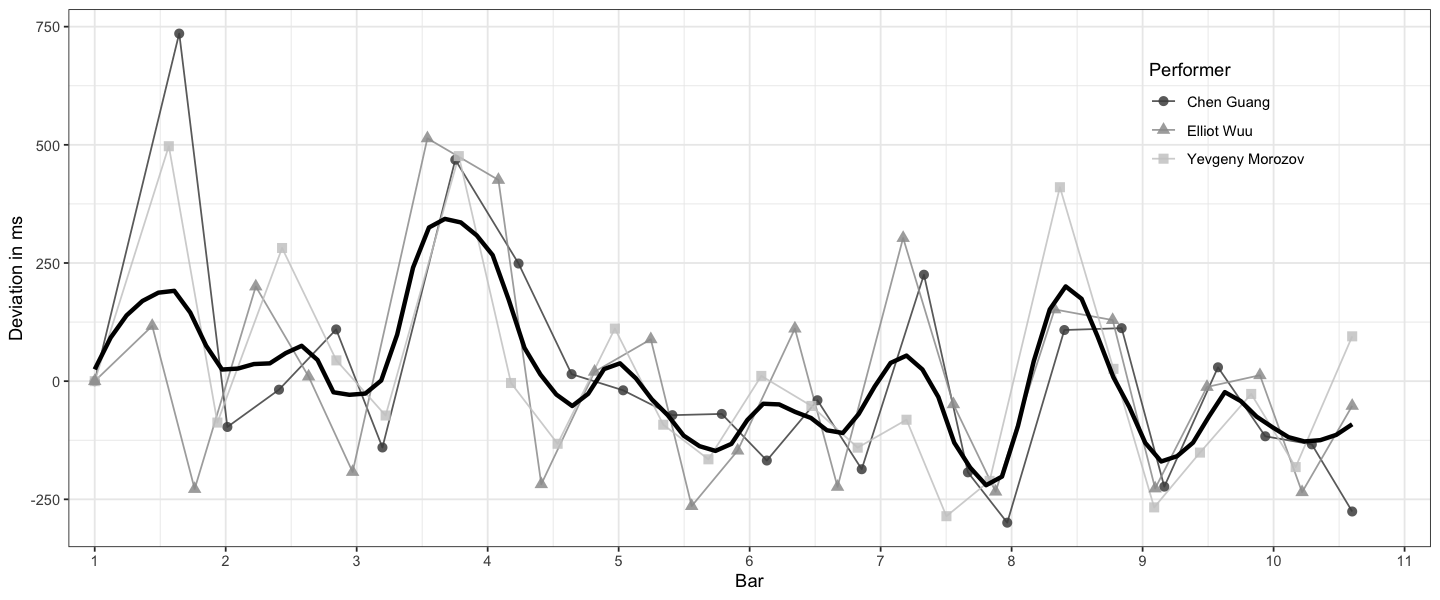

In [20]:
options(repr.plot.width = 12, repr.plot.height = 5)
g1 <- ggplot(DF,aes(x=perf_N,y=scoredelta_rawperf_Ndelta,colour=Performer,shape=Performer))+
  geom_line(alpha=0.85)+
  geom_point(alpha=0.85,size=2.5)+
  scale_color_grey(start = 0.30,end = 0.8)+
  geom_smooth(aes(colour = NULL,shape=NULL), method = "loess", span=0.2,se=FALSE,colour='black',linewidth=1.25)+
  scale_x_continuous(limits=c(0,30),breaks = seq(0,30,by=3),expand = c(0.02,0.002),labels=(seq(0,30,by=3)/3)+1) +
  xlab('Bar')+
  ylab('Deviation in ms')+
  theme_bw()+
  theme(legend.position=c(.85, .80))+
  theme(legend.background = element_blank()) +  # Remove overall border
  theme(legend.key = element_blank())
print(g1)

## References


- Foscarin, F., Mcleod, A., Rigaux, P., Jacquemard, F., & Sakai, M. (2020). ASAP: a dataset of aligned scores and performances for piano transcription. In _International Society for Music Information Retrieval Conference_ (pp. 534-541).